In [20]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [21]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [22]:
X = df.values[:, 1:-1].astype(np.float32)
y = df.values[:, -1].astype(int) - 1      

Y = to_categorical(y, num_classes=5)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (9200, 178)
X_test_scaled shape: (2300, 178)


In [23]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5)) 
model.add(Activation('softmax'))

c:\Users\Romala\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 256)            │        45,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,661 (424.46 KB)

 Trainable params: 108,661 (424.46 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_accuracy',    
    patience=10,           
    restore_best_weights=True,  
    verbose=1
)


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


hist = model.fit(
    X_train_scaled,
    Y_train,
    epochs=50,
    batch_size=10,
    validation_data=(X_test_scaled, Y_test),
    callbacks=[early_stop],    
    verbose=2
)

Epoch 1/50
920/920 - 4s - 5ms/step - accuracy: 0.4718 - loss: 1.1539 - val_accuracy: 0.5500 - val_loss: 1.0078
Epoch 2/50
920/920 - 5s - 5ms/step - accuracy: 0.6298 - loss: 0.8049 - val_accuracy: 0.6152 - val_loss: 0.8048
Epoch 3/50
920/920 - 2s - 3ms/step - accuracy: 0.6729 - loss: 0.6873 - val_accuracy: 0.6435 - val_loss: 0.7829
Epoch 4/50
920/920 - 1s - 1ms/step - accuracy: 0.6807 - loss: 0.6581 - val_accuracy: 0.6513 - val_loss: 0.7354
Epoch 5/50
920/920 - 1s - 2ms/step - accuracy: 0.7087 - loss: 0.6022 - val_accuracy: 0.6704 - val_loss: 0.7068
Epoch 6/50
920/920 - 2s - 2ms/step - accuracy: 0.7074 - loss: 0.5959 - val_accuracy: 0.6630 - val_loss: 0.7552
Epoch 7/50
920/920 - 3s - 3ms/step - accuracy: 0.7343 - loss: 0.5422 - val_accuracy: 0.6657 - val_loss: 0.7011
Epoch 8/50
920/920 - 2s - 2ms/step - accuracy: 0.7427 - loss: 0.5124 - val_accuracy: 0.6543 - val_loss: 0.7679
Epoch 9/50
920/920 - 2s - 2ms/step - accuracy: 0.7557 - loss: 0.4794 - val_accuracy: 0.6791 - val_loss: 0.7374
E

In [9]:
model.save("ann.h5")
print("Model saved as ann.h5")

Model saved as ann.h5


In [10]:
from keras.models import load_model

model = load_model("ann.h5")

In [ ]:

test_loss, test_acc = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


y_pred_probs = model.predict(X_test_scaled)


y_pred_classes = np.argmax(y_pred_probs, axis=1)

y_true_classes = np.argmax(Y_test, axis=1)



Test Accuracy: 0.7287
Test Loss: 1.1878
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


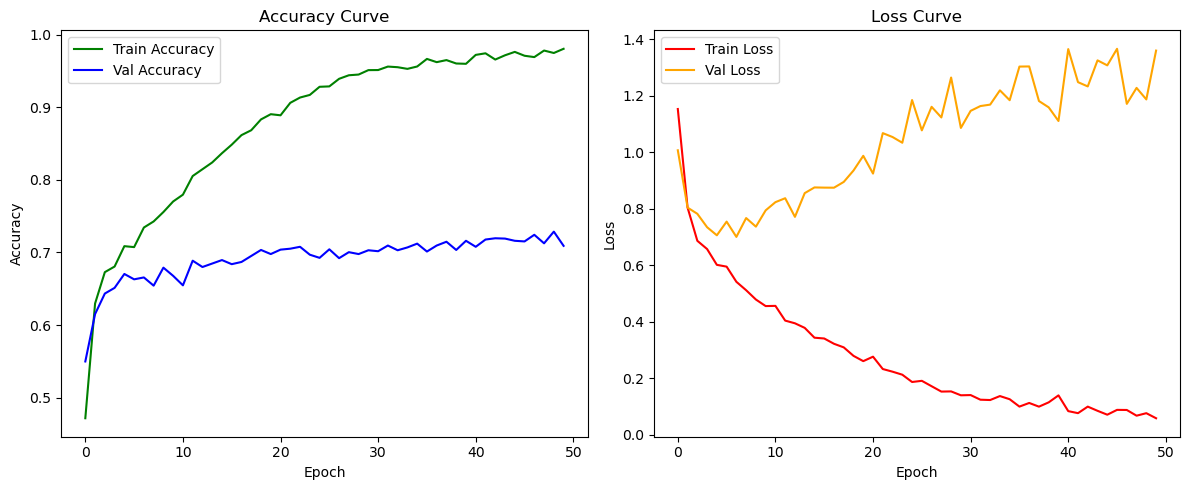

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss', color='red')
plt.plot(hist.history['val_loss'], label='Val Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))



Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       454
           1       0.64      0.63      0.64       477
           2       0.64      0.67      0.65       472
           3       0.75      0.76      0.75       422
           4       0.70      0.65      0.67       475

    accuracy                           0.73      2300
   macro avg       0.73      0.73      0.73      2300
weighted avg       0.73      0.73      0.73      2300



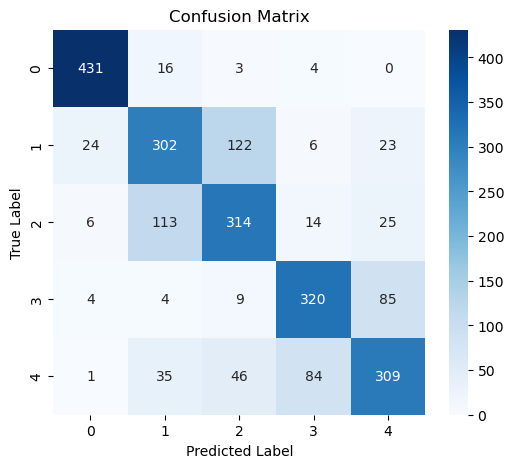

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    'y_true': y_true_classes,
    'y_pred': y_pred_classes
})
print(comparison_df.head(20))  


    y_true  y_pred
0        1       4
1        0       0
2        0       0
3        0       0
4        2       2
5        1       1
6        2       1
7        0       0
8        3       3
9        0       0
10       2       2
11       0       0
12       1       1
13       3       3
14       1       2
15       0       0
16       2       1
17       2       1
18       1       1
19       4       3


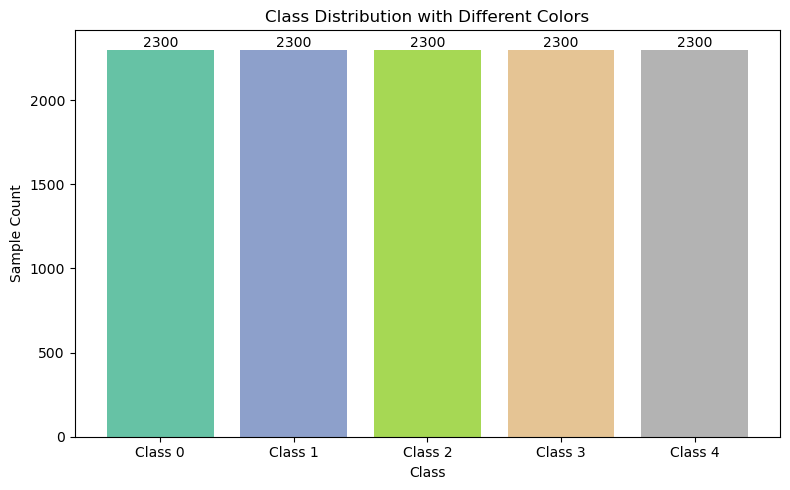

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y, return_counts=True)

colors = plt.cm.Set2(np.linspace(0, 1, len(unique)))  
plt.figure(figsize=(8, 5))
bars = plt.bar(unique, counts, tick_label=[f'Class {i}' for i in unique], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.title("Class Distribution with Different Colors")
plt.xlabel("Class")
plt.ylabel("Sample Count")
plt.tight_layout()
plt.show()


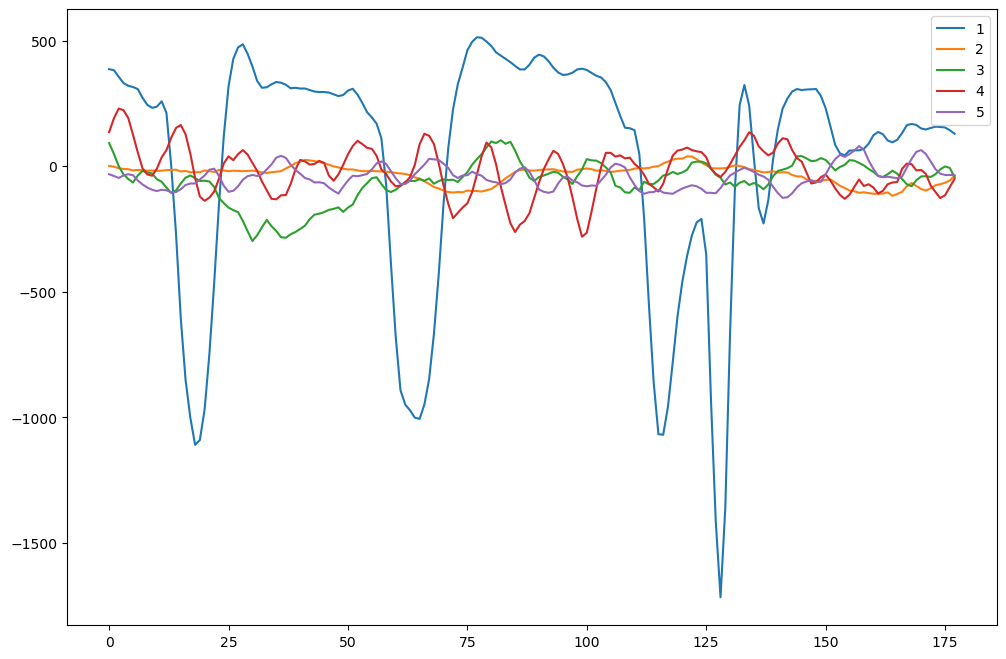

In [25]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()